# Extension: Repetition-Neighbor Lag-CRP
The lag-CRP measures the probability of recalling an item at a particular lag **given the current recall position**, conditional on items that remain available for recall. 
Here we follow up on our previous repetition-robust implementation of the Lag-CRP analysis, as well as our Repetition Lag-CRP analysis that separately tracks transitions from repeated items to their neighbors, with a new implementation that allows us to calculate the **Repetition-Neighbor Lag-CRP**.

In this analysis, we calculate transition probabilities from neighbors of the second presentation of repeated items to neighbors of the first presentation of the same repeated items, and/or vice versa.
This allows us to investigate how item repetition affects the contextual features associated with neighboring items in a study list as indicated in free recall.

For repeated items studied at positions $i$ and $j$ with spacing of at least 4 study positions, in this version of the analysis:

1. We only tabulate lag-transitions from recalls of items studied at position $j+1$ and/or $j+2$.
2. We tabulate lags according to the study position of the first presentation of the repeated item, so that we can calculate associations with neighbors of position $i$.

We optionally also or alternatively consider transitions from recalls of items studied at position $i+1$ and/or $i+2$ to neighbors of the repeated item at position $j$.

We include a `tabulate_trial` method that takes a trial and updates the `NeighborCRPTabulation` object with the actual and available transitions for each lag at each recall attempt. Unlike the previous implementation, we directly return actual and available lag tabulations across the trial.

Then in our `repneighborcrp` function, we aggregate the counts of actual and available transitions across all trials, and divide the actual transitions by the available transitions to get the Repetition-Neighbor Lag-CRP for each lag.

In [ ]:
import os
from jaxcmr.analyses.repneighborcrp import plot_rep_neighbor_crp
from jaxcmr.helpers import find_project_root, generate_trial_mask, load_data
from jaxcmr.repetition import make_control_dataset
from jaxcmr.typing import RecallDataset
import matplotlib.pyplot as plt
import jax.numpy as jnp

j2i


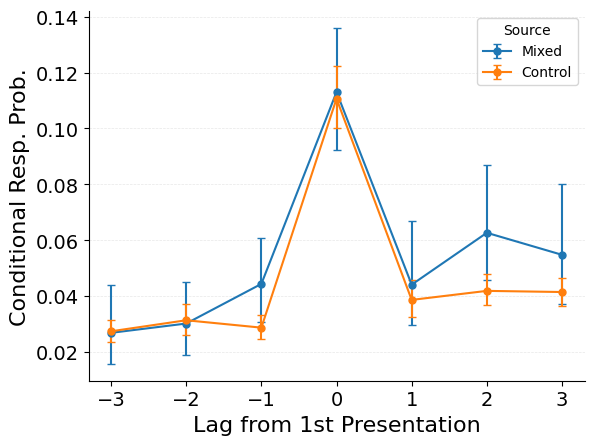

i2j


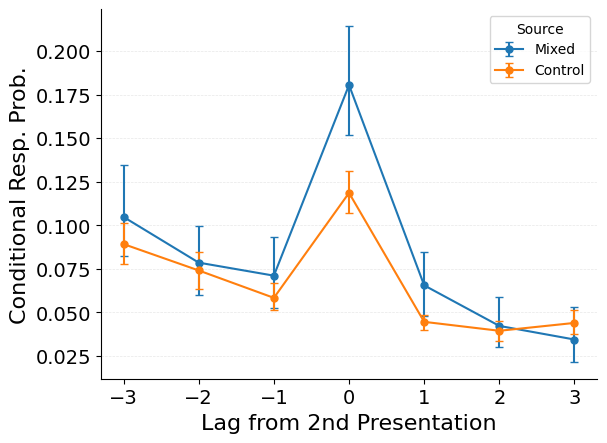

both


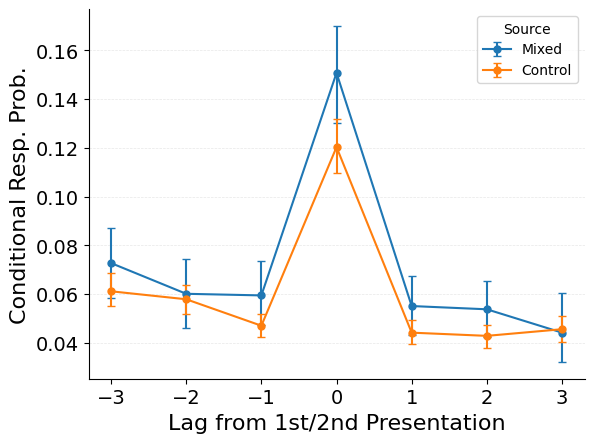

In [4]:


# parameters
data_query = "data['list_type'] == 4"
control_trial_query = "data['list_type'] == 1"
data_path = os.path.join(find_project_root(), "data/LohnasKahana2014.h5")

# set up data structures
data: RecallDataset = load_data(data_path) # type: ignore
trial_mask = generate_trial_mask(data, data_query)

# create control dataset
ctrl_data = make_control_dataset(
    data,
    mixed_query=data_query,
    control_query=control_trial_query,
    n_shuffles=10,
    seed=0,
)
# control_trial_mask = generate_trial_mask(ctrl_data, data_query)
control_trial_mask = jnp.ones((ctrl_data["recalls"].shape[0],), dtype=bool)

# plot
direction = "j2i"
print(direction)
plot_rep_neighbor_crp(
    [data, ctrl_data], [trial_mask, control_trial_mask], direction=direction, use_lag2=True, contrast_name="Source", labels=["Mixed", "Control"]
)
plt.show()

direction = "i2j"
print(direction)
plot_rep_neighbor_crp(
    [data, ctrl_data], [trial_mask, control_trial_mask], direction=direction, use_lag2=True, contrast_name="Source", labels=["Mixed", "Control"]
)
plt.show()

direction = "both"
print(direction)
plot_rep_neighbor_crp(
    [data, ctrl_data], [trial_mask, control_trial_mask], direction=direction, use_lag2=True, contrast_name="Source", labels=["Mixed", "Control"]
)
plt.show()